In [1]:
import math
import time
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import mlx.core as mx

from main import *

%load_ext autoreload
%autoreload 2

In [2]:
X_train, y_train, X_test, y_test, true_params = load_tanh(ntrain=32, return_params=True)

X_train, y_train, X_test, y_test = map(mx.array, (X_train, y_train, X_test, y_test))

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (32, 2)
Training labels shape:  (32,)
Test data shape:  (8, 2)
Test labels shape:  (8,)


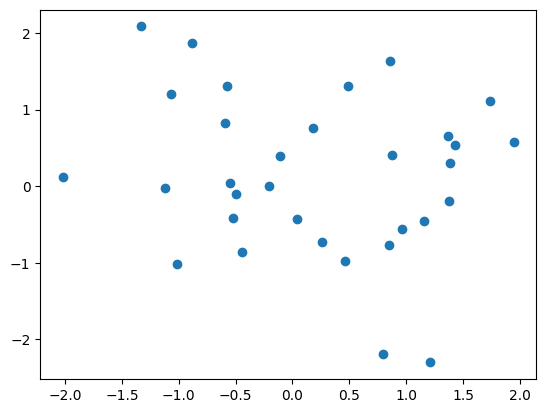

In [3]:
fig, ax = plt.subplots()

xs = X_train[:, 0]
ys = X_train[:, 1]

ax.scatter(xs, ys)

In [4]:
# TODO: Prepro, split into validation

In [8]:
lr = 1e-2
input_dim = X_train.shape[-1]
hidden_dim = 1
n_epochs = 10_000

def forward(params, X):
    return mx.tanh(X @ params)

params = rnncellnew(input_dim, hidden_dim)
fwd = rnncellfwd
# params = 1e-2 * mx.random.normal(shape=(input_dim, 1))
# fwd = forward

model = (fwd, params)

sgd = sgdnew(lr=lr)

tic = time.perf_counter_ns()
trained_params, metrics = sgdsolve(sgd=sgd, 
                                   model=model, 
                                   X=X_train, 
                                   y=y_train, 
                                   batch_size=8, 
                                   n_epochs=n_epochs, 
                                   print_every=100)
toc = time.perf_counter_ns()

dt = toc - tic
print(f"Untrained parameters: {params}")
print(f"Trained parameters: {trained_params}")
print(f"True parameters: {mx.array(true_params)}")
print(f"Error norm: {(mx.array(true_params) - trained_params['wx']).square().sum():.10f}")
print(f"Training time (ns): {dt}")
print(f"Throughput (ns/it): {dt / len(metrics)}")

step: 100 | epoch: 24 | loss: 0.10560 | dt: 295042ns
step: 200 | epoch: 49 | loss: 0.04911 | dt: 245500ns
step: 300 | epoch: 74 | loss: 0.03522 | dt: 313083ns
step: 400 | epoch: 99 | loss: 0.02495 | dt: 273583ns
step: 500 | epoch: 124 | loss: 0.02320 | dt: 269375ns
step: 600 | epoch: 149 | loss: 0.01284 | dt: 405917ns
step: 700 | epoch: 174 | loss: 0.01938 | dt: 273083ns
step: 800 | epoch: 199 | loss: 0.00738 | dt: 278666ns
step: 900 | epoch: 224 | loss: 0.00545 | dt: 322666ns
step: 1000 | epoch: 249 | loss: 0.01095 | dt: 347375ns
step: 1100 | epoch: 274 | loss: 0.00870 | dt: 372875ns
step: 1200 | epoch: 299 | loss: 0.00260 | dt: 374792ns
step: 1300 | epoch: 324 | loss: 0.00663 | dt: 324083ns
step: 1400 | epoch: 349 | loss: 0.00381 | dt: 315000ns
step: 1500 | epoch: 374 | loss: 0.00302 | dt: 1001084ns
step: 1600 | epoch: 399 | loss: 0.00211 | dt: 277041ns
step: 1700 | epoch: 424 | loss: 0.00303 | dt: 319125ns
step: 1800 | epoch: 449 | loss: 0.00065 | dt: 284417ns
step: 1900 | epoch: 47